# Análisis Exploratorio

    Fuente de información: NUSE
    Archivos: 
    NUSE 934 611(M) 2017-2018.dsv
    NUSE 934-611-611M ENERO2019.csv

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import plotly.express as px
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)  
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Create folder to save figures
import os

if not os.path.exists("figuras_nuse"):
    os.mkdir("figuras_nuse")

In [ ]:
def print_Data(df):
    display(df.style.hide_index())

In [ ]:
data_location = '/Users/anamaria/Downloads/NUSE 934 611(M) 2017-2018.dsv'
data2018=pd.read_csv(data_location,delimiter="|")

In [ ]:
data_location = '/Users/anamaria/Downloads/NUSE 934-611-611M ENERO2019.csv'
data2019=pd.read_csv(data_location,delimiter=";")

## Join datasets

In [ ]:
frames = [data2018, data2019]
data = pd.concat(frames)

In [ ]:
data.head()

In [ ]:
print("Tamaño:",data.shape)
print("size: ",data.size)
print("Porcentaje Celdas Vacias:",data.isna().mean().mean())
print("Porcentaje Celdas con valor '-':",(data == "-").mean().mean())
print("Filas duplicadas",data.duplicated().sum())

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print("Tamaño:",data.shape)
print("size: ",data.size)
print("Porcentaje Celdas Vacias:",data.isna().mean().mean())
print("Porcentaje Celdas con valor '-':",(data == "-").mean().mean())
print("Filas duplicadas",data.duplicated().sum())

In [ ]:
pd.DataFrame({"Tipo de dato":data.dtypes.values,
              "Celdas con valor '-'":(data == '-').sum().values,
             "Celdas vacías": data.isna().sum().values},
             index=data.columns)

# Basic profiling

In [ ]:
data.profile_report()

### Analisis campo 'FECHA' - univariado

In [ ]:
data['FECHA'] =  pd.to_datetime(data['FECHA'])
data2018['FECHA'] =  pd.to_datetime(data2018['FECHA'])
subdata=pd.DataFrame(data.groupby(["FECHA"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure for top frequent values
fig = px.bar(topdata, x='Cantidad', y='FECHA', orientation='h', color = 'FECHA', 
             color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Top dates of incident reports",yaxis={"type":"category"}, showlegend=False)
#fig.write_image("figuras_nuse/fecha_bar.png")
fig.show()

### Analisis campo 'FECHA'  vs tipo incidente - bivariado

In [ ]:
subdata=pd.DataFrame(data.groupby(["FECHA",'TIPO_DETALLE']).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
data['TIPO_DETALLE'].unique()

In [ ]:
subdata.head()

In [ ]:
(subdata.query('TIPO_DETALLE == "934 - RIÑA"').sort_values(by=['Cantidad'],ascending=False))[:10]

#### Time series

In [ ]:
fig = px.line(subdata, x='FECHA', y='Cantidad', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[0:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Serie de tiempo incidentes", legend_orientation='h',
                  xaxis_rangeslider_visible=True)
fig.update_xaxes(title="")
#fig.write_image("figuras_nuse/fecha_incidentes_ts.png")
fig.show()

In [ ]:
#Riñas
fig = px.line(subdata.query('TIPO_DETALLE == "934 - RIÑA"'), x='FECHA', y='Cantidad',
              color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Serie de tiempo incidente riña",
                  xaxis_rangeslider_visible=False)
fig.write_image("figuras_nuse/fecha_riña_ts.png")
fig.show()

In [ ]:
#Maltrato mujer
fig = px.line(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), x='FECHA', y='Cantidad',
              color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Serie de tiempo incidente maltrato a mujer",
                  xaxis_rangeslider_visible=False)
fig.write_image("figuras_nuse/fecha_maltrato_mujer_ts.png")
fig.show()

In [ ]:
#Maltrato
fig = px.line(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'), x='FECHA', y='Cantidad',
              color_discrete_sequence = px.colors.qualitative.Prism[3:])
fig.update_layout(title_text="Serie de tiempo incidente riña",
                  xaxis_rangeslider_visible=False)
fig.write_image("figuras_nuse/fecha_maltrato_ts.png")
fig.show()

#### Bar frequency

In [ ]:
#Bar figure for top frequent values riñas
topdata = (subdata.query('TIPO_DETALLE == "934 - RIÑA"').sort_values(by=['Cantidad'],ascending=False))[:10]
fig = px.bar(topdata, x='Cantidad',y='FECHA', color='FECHA', orientation='h', 
             color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Top dates of incident reports",yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/fecha_riña_bar.png")
fig.show()

In [ ]:
#Bar figure for top frequent values riñas
topdata = (subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"').sort_values(by=['Cantidad'],ascending=False))[:10]
fig = px.bar(topdata, x='Cantidad', y='FECHA', color='FECHA', orientation='h', color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Top dates of incident reports",yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/fecha_maltrato_mujer_bar.png")
fig.show()

### Analisis variable aux 'day_of_week' - univariado

In [ ]:
data['day_of_week'] = data["FECHA"].dt.day_name()
data2018['day_of_week'] = data2018["FECHA"].dt.day_name()

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
#Incident reports by week day
subdata=pd.DataFrame(data.groupby(["day_of_week","ANIO"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.bar(subdata, x='ANIO', y='Cantidad', color = 'day_of_week', barmode = 'group',
            category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
            color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Incident reports by day of week")
#fig.write_image("figuras_nuse/day_week_year_bar.png")
fig.show()

In [ ]:
subdata=pd.DataFrame(data.groupby(["day_of_week","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Probability riñas reports by week day
subdata_riña = pd.DataFrame(subdata.query('TIPO_DETALLE == "934 - RIÑA"'))
Cantidad_total = subdata_riña['Cantidad'].sum()
subdata_riña['Probabilidad'] = subdata_riña['Cantidad']/Cantidad_total

# Bar figure
fig = px.bar(subdata_riña, x='Probabilidad', y='day_of_week', orientation='h', color='day_of_week',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]})
fig.update_layout(title_text="Probabilidad de reporte de riña por día de la semana",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/dia_semana_probabilidad_riña.png")
fig.show()

In [ ]:
#Probability maltrato mujer reports by week day
subdata_maltrato_mujer = pd.DataFrame(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'))
Cantidad_total = subdata_maltrato_mujer['Cantidad'].sum()
subdata_maltrato_mujer['Probabilidad'] = subdata_maltrato_mujer['Cantidad']/Cantidad_total

# Bar figure
fig = px.bar(subdata_maltrato_mujer, x='Probabilidad', y='day_of_week', orientation='h', color='day_of_week',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]})
fig.update_layout(title_text="Probabilidad de reporte de maltrato a mujer por día de la semana",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/dia_semana_probabilidad_maltrato_mujer.png")
fig.show()

In [ ]:
#Probability maltrato reports by week day
subdata_maltrato = pd.DataFrame(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'))
Cantidad_total = subdata_maltrato['Cantidad'].sum()
subdata_maltrato['Probabilidad'] = subdata_maltrato['Cantidad']/Cantidad_total

# Bar figure
fig = px.bar(subdata_maltrato, x='Probabilidad', y='day_of_week', orientation='h', color='day_of_week',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]})
fig.update_layout(title_text="Probabilidad de reporte de maltrato por día de la semana",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/dia_semana_probabilidad_maltrato.png")
fig.show()

### Analisis variable aux 'day_of_week' vs tipo incidente- bivariado

In [ ]:
subdata=pd.DataFrame(data.groupby(["day_of_week","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Scatter plot all incidents
fig = px.scatter(subdata, x='day_of_week', y='Cantidad', color='TIPO_DETALLE',size="Cantidad",size_max=50,
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              color_discrete_sequence = px.colors.qualitative.Prism[3:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por día de la semana", legend_orientation='h',
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/dia_incidentes_scatter.png")
fig.show()

In [ ]:
#Incident reports by week day - maltrato a mujer
subdata=pd.DataFrame(data.groupby(["day_of_week","ANIO","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.bar(subdata.query('TIPO_DETALLE == TIPO_DETALLE == "934 - RIÑA"'), x='ANIO', y='Cantidad', color = 'day_of_week', barmode = 'group',
            category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
            color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Incident reports by day of week")
fig.write_image("figuras_nuse/day_week_year_riña_bar.png")
fig.show()

In [ ]:
#Incident reports by week day - maltrato a mujer
subdata=pd.DataFrame(data.groupby(["day_of_week","ANIO","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.bar(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), x='ANIO', y='Cantidad', color = 'day_of_week', barmode = 'group',
            category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
            color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Incident reports by day of week")
fig.write_image("figuras_nuse/day_week_year_maltrato_mujer_bar.png")
fig.show()

### Análisis campo 'HORA'

In [ ]:
subdata=pd.DataFrame(data.groupby(["HORA"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
#Format 'HORA' field into datetime to proper visualization
data['HORA']=data["HORA"].astype(str).str.rjust(4,'0')
data['time_stamp']=pd.to_datetime(data['HORA'],format= '%H%M').dt.time

### Análisis campo 'HORA' - tipo incidente: bivariado
#### Time series

In [ ]:
##Time series
subdata=pd.DataFrame(data.groupby(["time_stamp"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.line(subdata, x='time_stamp', y='Cantidad',
              color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports time series - time (24 hr format)",
                  xaxis_rangeslider_visible=True)
fig.write_image("figuras_nuse/hora_ts.png")
fig.show()

In [ ]:
subdata=pd.DataFrame(data.groupby(["time_stamp","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Riñas
subdata_riña = pd.DataFrame(subdata.query('TIPO_DETALLE == "934 - RIÑA"'))
Cantidad_total = subdata_riña['Cantidad'].sum()
subdata_riña['Probabilidad'] = subdata_riña['Cantidad']/Cantidad_total

fig = px.line(subdata_riña, x='time_stamp', y='Probabilidad',
              color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Probabilidad de reporte de riñas por hora",
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/hora_probab_riña_ts.png")
fig.show()

In [59]:
#Maltrato mujer
subdata_maltrato_mujer = pd.DataFrame(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'))
Cantidad_total = subdata_maltrato_mujer['Cantidad'].sum()
subdata_maltrato_mujer['Probabilidad'] = subdata_maltrato_mujer['Cantidad']/Cantidad_total

fig = px.line(subdata_maltrato_mujer, x='time_stamp', y='Probabilidad',
              color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Reporte de 'maltrato a mujer' por hora",
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/hora_probab_maltrato_mujer_ts.png")
fig.show()

In [61]:
#Maltrato
subdata_maltrato = pd.DataFrame(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'))
Cantidad_total = subdata_maltrato['Cantidad'].sum()
subdata_maltrato['Probabilidad'] = subdata_maltrato['Cantidad']/Cantidad_total

fig = px.line(subdata_maltrato, x='time_stamp', y='Probabilidad',
              color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Reporte de 'maltrato a mujer' por hora",
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/hora_probab_maltrato_ts.png")
fig.show()

### Análisis campo 'HORA' y día - tipo incidente: bivariado
#### Time series

In [ ]:
#Incident reports by week day and hour (total reportes)
subdata=pd.DataFrame(data.groupby(["time_stamp","day_of_week"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.line(subdata, x="time_stamp", y="Cantidad", facet_row="day_of_week", color="day_of_week",
              width=800, height=1400,  color_discrete_sequence = px.colors.qualitative.Prism[1:],
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              labels={"day_of_week":"day"})
fig.update_layout(title_text="Incident reports by day of week and hour",
                 showlegend=False)
fig.write_image("figuras_nuse/day_week_hour_ts.png")
fig.show()

In [ ]:
#Incident reports by week day and hour riña
subdata=pd.DataFrame(data.groupby(["time_stamp","day_of_week","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.line(subdata.query('TIPO_DETALLE == "934 - RIÑA"'), x="time_stamp", y="Cantidad", facet_row="day_of_week", color="day_of_week",
              width=800, height=1400,  color_discrete_sequence = px.colors.qualitative.Prism[1:],
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              labels={"day_of_week":"day"})
fig.update_layout(title_text="Reporte riñas por día y hora",
                 showlegend=False)
fig.write_image("figuras_nuse/day_week_hour_riña_ts.png")
fig.show()

In [ ]:
#Incident reports by week day and hour maltrato mujer
subdata=pd.DataFrame(data.groupby(["time_stamp","day_of_week","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.line(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), x="time_stamp", y="Cantidad", facet_row="day_of_week", color="day_of_week",
              width=800, height=1400,  color_discrete_sequence = px.colors.qualitative.Prism[1:],
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              labels={"day_of_week":"day"})
fig.update_layout(title_text="Reporte 'maltrato mujer' por día y hora",legend_orientation='h',
                 showlegend=True)
#fig.write_image("figuras_nuse/day_week_hour_mmujer_ts.png")
fig.show()

### Análisis campo 'ANIO'

In [ ]:
#Format to string
data['ANIO']=data["ANIO"].astype(str)

In [ ]:
subdata=pd.DataFrame(data.groupby(["ANIO"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(subdata, x='Cantidad', y='ANIO', color='ANIO', orientation='h', 
             color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by year",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/año_bar.png")
fig.show()

### Análisis año - tipo incidente: bivariado

In [ ]:
data2018['ANIO']=data2018["ANIO"].astype(str)
subdata=pd.DataFrame(data2018.groupby(["ANIO","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Bar plot
fig = px.bar(subdata, x='ANIO', y='Cantidad', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[0:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por año", legend_orientation='h',xaxis={"type":"category"},
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/año_incidentes_bar.png")
fig.show()

### Análisis campo 'MES'

In [ ]:
data2018['MES']=data2018["MES"].astype(str)

In [ ]:
subdata=pd.DataFrame(data2018.groupby(["MES"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(subdata, x='Cantidad', y='MES', orientation='h', color='MES',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]})
fig.update_layout(title_text="Incident reports by month",
                 yaxis={"type":"category"}, showlegend=False)
#fig.write_image("figuras_nuse/mes_bar_2017-2018.png")
fig.show()

In [ ]:
#Probabilidad ocurrencia de reporte cada tipo de incidente por mes
subdata=pd.DataFrame(data2018.groupby(["MES","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Tipo: riña
subdata_riña = pd.DataFrame(subdata.query('TIPO_DETALLE == "934 - RIÑA"'))
Cantidad_total = subdata_riña['Cantidad'].sum()
subdata_riña['Probabilidad'] = subdata_riña['Cantidad']/Cantidad_total
# Bar figure
fig = px.bar(subdata_riña, x='Probabilidad', y='MES', orientation='h', color='MES',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]})
fig.update_layout(title_text="Probabilidad de reporte de riña por mes",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/mes_probabilidad_riña.png")
fig.show()

In [ ]:
#Tipo: maltrato mujer
subdata_maltrato_mujer = pd.DataFrame(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'))
Cantidad_total = subdata_maltrato_mujer['Cantidad'].sum()
subdata_maltrato_mujer['Probabilidad'] = subdata_maltrato_mujer['Cantidad']/Cantidad_total
# Bar figure
fig = px.bar(subdata_maltrato_mujer, x='Probabilidad', y='MES', orientation='h', color='MES',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]})
fig.update_layout(title_text="Probabilidad de reporte de maltrato a mujer por mes",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/mes_probabilidad_maltrato_mujer.png")
fig.show()

In [ ]:
#Tipo: maltrato
subdata_maltrato = pd.DataFrame(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'))
Cantidad_total = subdata_maltrato['Cantidad'].sum()
subdata_maltrato['Probabilidad'] = subdata_maltrato['Cantidad']/Cantidad_total
# Bar figure
fig = px.bar(subdata_maltrato, x='Probabilidad', y='MES', orientation='h', color='MES',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]})
fig.update_layout(title_text="Probabilidad de reporte de maltrato por mes",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/mes_probabilidad_maltrato.png")
fig.show()

### Análisis año: bivariado

In [ ]:
#Graph incidents by month and day of week
subdata=pd.DataFrame(data2018.groupby(["MES","day_of_week"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.bar(subdata, x="MES", y="Cantidad", color="day_of_week",
            category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
            labels={"day_of_week":"day"},color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by day of week and month")
fig.write_image("figuras_nuse/day_week_month_bar_2017-2018.png")
fig.show()

In [ ]:
#Scatter plot
subdata=pd.DataFrame(data2018.groupby(["MES","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.scatter(subdata, x='MES', y='Cantidad', color='TIPO_DETALLE',size="Cantidad",size_max=30,
              color_discrete_sequence = px.colors.qualitative.Prism[3:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por mes", legend_orientation='h',
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/mes_incidentes_scatter.png")
fig.show()

### Análisis campo 'PERIODO_TS'

In [ ]:
subdata=pd.DataFrame(data.groupby(["PERIODO_TS"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
print_Data(topdata)

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
fig = px.bar(subdata, y="PERIODO_TS", x="Cantidad", orientation='h', color="PERIODO_TS",
            color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by 'PERIODO_TS'",showlegend=False)
fig.write_image("figuras_nuse/periodo_bar.png")
fig.show()

### Análisis campo 'COD_LOCALIDAD' y 'LOCALIDAD'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_LOCALIDAD","LOCALIDAD"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:20])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='LOCALIDAD', orientation='h', color='LOCALIDAD',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'localidades'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/localidad_bar.png")
fig.show()

### Análisis localidad: bivariado

In [ ]:
#Scatter plot
subdata=pd.DataFrame(data2018.groupby(["LOCALIDAD","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.scatter(subdata, x='LOCALIDAD', y='Cantidad', color='TIPO_DETALLE',size="Cantidad",size_max=30,
                 width=1000, height=600,
              color_discrete_sequence = px.colors.qualitative.Prism[3:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por mes", legend_orientation='v', showlegend=False,
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="",tickangle=90)
fig.write_image("figuras_nuse/localidad_incidentes_scatter.png")
fig.show()

### Análisis campo 'COD_UPZ' y 'UPZ'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_UPZ","UPZ"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='UPZ', orientation='h', color='UPZ',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'UPZ'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/upz_bar.png")
fig.show()

### Análisis campos 'COD_SEC_CATAST‘ y ‘SEC_CATASTRAL'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_SEC_CATAST","SEC_CATASTRAL"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='SEC_CATASTRAL', orientation='h', color='SEC_CATASTRAL',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'UPZ'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/sec_catastr_bar.png")
fig.show()

### Análisis campos 'COD_BARRIO' Y 'BARRIO'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_BARRIO","BARRIO"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='BARRIO', orientation='h', color='BARRIO',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'BARRIO'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/barrio_bar.png")
fig.show()

### Mapa con reporte de incidencias (LATITUD, LONGITUD)

In [ ]:
position=pd.DataFrame(data.groupby(['LATITUD','LONGITUD','TIPO_DETALLE']).size()).reset_index().rename(columns={0:"Cantidad"})
topdata=(position.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
print_Data(topdata)

In [ ]:
#Statistical description
pd.DataFrame(position.describe())

In [ ]:
px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position, lat="LATITUD", lon="LONGITUD",zoom=10,size='Cantidad',color='Cantidad')
fig.write_image("figuras_nuse/mapa.png")
fig.show()

### Mapa por tipo de incidente: bivariado

In [ ]:
px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position.query('TIPO_DETALLE == "934 - RIÑA"'), lat="LATITUD", lon="LONGITUD",zoom=10,size='Cantidad',color='Cantidad')
fig.write_image("figuras_nuse/mapa_riña.png")
fig.show()

In [ ]:
px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), lat="LATITUD", lon="LONGITUD",zoom=10,size='Cantidad',color='Cantidad')
fig.write_image("figuras_nuse/mapa_mmujer.png")
fig.show()

### Análisis campo 'STR_DIRECCION_INCIDENTE'

In [ ]:
subdata=pd.DataFrame(data.groupby(["STR_DIRECCION_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])
print_Data(topdata)

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='STR_DIRECCION_INCIDENTE', orientation='h', color='STR_DIRECCION_INCIDENTE',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'STR_DIRECCION_INCIDENTE'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/direccion_bar.png")
fig.show()

### Análisis campo 'TIPO_DETALLE'

In [ ]:
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(subdata, x='Cantidad', y='TIPO_DETALLE', color='TIPO_DETALLE', orientation='h', 
             color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by type",
                 yaxis={"type":"category"}, showlegend=False)
#fig.write_image("figuras_nuse/tipo_incidente_bar.png")
fig.show()

### Análisis campo 'ESTADO_INCIDENTE'

In [ ]:
subdata=pd.DataFrame(data.groupby(["ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
print_Data(subdata)

In [ ]:
#Analysis 'TIPO_DETALLE' and 'ESTADO_INCIDENTE'
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE","ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
print_Data(subdata)

In [ ]:
#Graph incidents by 'TIPO' and 'ESTADO=CERRADO'
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE","ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.bar(subdata.set_index('ESTADO_INCIDENTE').filter(like='CERRADO',axis=0), x="TIPO_DETALLE", y="Cantidad",
             color='TIPO_DETALLE',color_discrete_sequence = px.colors.qualitative.Prism[5:])
fig.update_layout(title_text="Incident reports in state 'cerrado'",showlegend=False)
#fig.write_image("figuras_nuse/incidentes_cerrados_bar.png")
fig.show()

In [ ]:
#Graph incidents by 'TIPO' and 'ESTADO=CREADO'
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE","ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.bar(subdata.set_index('ESTADO_INCIDENTE').filter(like='CREADO',axis=0), x="TIPO_DETALLE", y="Cantidad",
             color='TIPO_DETALLE',color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports in state 'creado'",showlegend=False)
#fig.write_image("figuras_nuse/incidentes_creados_bar.png")
fig.show()

### Análisis campo 'LOG_TEXT'

In [ ]:
text = ' '.join(data['LOG_TEXT'].str.lower())

stopwords = set(STOPWORDS)
stopwords.update(['de','la','el','que','y','con','en'])

In [ ]:
wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords = stopwords, max_words=1000).generate(text)
fig = plt.figure(figsize = (20, 10),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("figuras_nuse/log_text",dpi=300,bbox_inches = "tight")
plt.show()

In [ ]:
## Add labels to stopwords
stopwords.update(['direction','messsageid','outgoing','origorganisation','originincidentturn',
                  'originincidentdate','originincidenttime','callorigin priority','location','easting',
                 'callernumber','callerforename','callorigin','alta','prioridad','nuse','origin',
                 'incaddnlinfo','incsecurity', 'northing','type','description','messageid origincidenturn',
                 'origincidenttime priority','priority','originincidentturn originincidentdate',
                 'originincidentdate originincidenttime'])


In [ ]:
wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords = stopwords, max_words=1000).generate(text)
fig = plt.figure(figsize = (20, 10),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("figuras_nuse/log_text2",dpi=300,bbox_inches = "tight")
plt.show()

## Tiempo /espacio

### Coordenadas vs. día semana: bivariado

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position, lat="LATITUD", lon="LONGITUD", animation_frame="day_of_week", zoom=10,
                        category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                        size='Cantidad',color='Cantidad')
fig.show()

### Coordenadas vs hora: bivariado

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','HORA']).size()).reset_index().rename(columns={0:"Cantidad"})
position=position.sort_values(by=['HORA'],ascending=True)

In [ ]:
fig = px.scatter_mapbox(position, lat="LATITUD", lon="LONGITUD", animation_frame="HORA", zoom=10,
                        size='Cantidad',color='Cantidad')
fig.show()

### Análisis incidentes por localidad/día de la semana: bivariado

In [ ]:
subdata = pd.DataFrame(data.groupby(['LOCALIDAD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

fig = px.scatter(subdata, x="LOCALIDAD", y="Cantidad", size="Cantidad", color="day_of_week",
                 width=1000, height=600,
                 hover_name="day_of_week", size_max=40,labels={"day_of_week":"day"})
fig.update_layout(title_text="Incident reports by day of week and 'localidad'",legend_orientation='v')
fig.update_xaxes(tickangle=90)
fig.write_image("figuras_nuse/localidad_día.png")
fig.show()

### Análisis incidentes por localidad/mes: bivariado

In [ ]:
subdata = pd.DataFrame(data2018.groupby(['LOCALIDAD','MES']).size()).reset_index().rename(columns={0:"Cantidad"})

fig = px.scatter(subdata, x="LOCALIDAD", y="Cantidad", size="Cantidad", color="MES",
                 width=1000, height=600,
                 hover_name="MES", size_max=40,labels={"day_of_week":"mes"})
fig.update_layout(title_text="Incident reports by month and 'localidad'",legend_orientation='v')
fig.update_xaxes(tickangle=90)
#fig.write_image("figuras_nuse/localidad_mes.png")
fig.show()

### Análisis incidentes por coordenada/día semana: bivariado

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Monday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_lunes.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Tuesday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_martes.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Wednesday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_miercoles.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Thursday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_jueves.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Friday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_viernes.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Saturday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_sabado.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Sunday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_domingo.png")
fig.show()

## Probabilidades condicionales

join


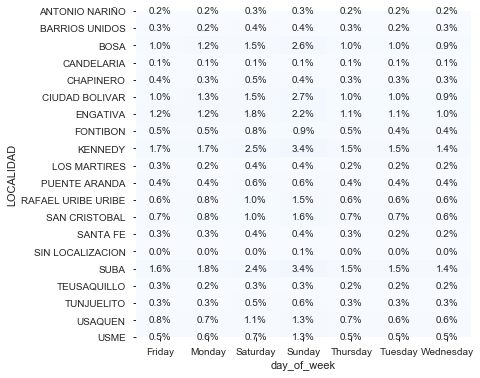

g_columna


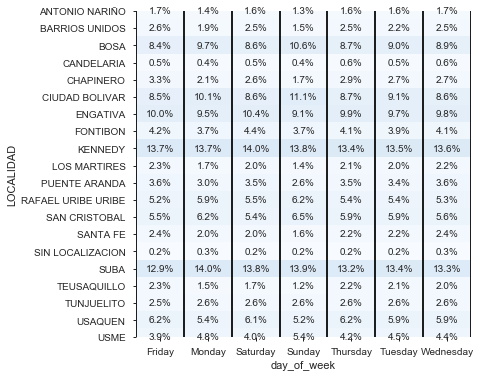

g_fila


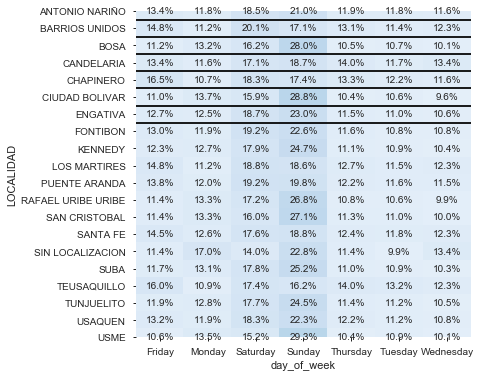

In [64]:
import seaborn as sns
var1='LOCALIDAD'
var2='day_of_week'
var_aux='ANIO'

A=data.groupby([var1,var2]).agg({'ANIO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(6, 6)
 g=sns.heatmap(M[k],square=False,vmin=0,vmax=1,annot=True,fmt=".1%",linewidths=0,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 if k == 1:
   ax.vlines([0, 1, 2,3,4,5,6,7], *ax.get_ylim())
 if k == 2:
   ax.hlines([0, 1, 2,3,4,5,6,7], *ax.get_xlim())

 #plt.savefig("figuras/ha_sido_victima_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()